In [39]:
import pandas as pd

# Read in the CSV files
department_df = pd.read_csv('Department_Information.csv')
employee_df = pd.read_csv('Employee_Information.csv')
counseling_df = pd.read_csv('Student_Counceling_Information.csv')
performance_df = pd.read_csv('Student_Performance_Data.csv')

print("Department Information:")
print(department_df.head())

print("\nEmployee Information:")
print(employee_df.head())

print("\nStudent Counseling Information:")
print(counseling_df.head())

print("\nStudent Performance Data:")
print(performance_df.head())



Department Information:
  Department_ID                 Department_Name         DOE
0     IDEPT4670           Aerospace Engineering   5/31/1961
1     IDEPT5528  Biosciences and Bioengineering   6/28/1943
2     IDEPT3115            Chemical Engineering    5/1/1940
3     IDEPT5881                       Chemistry    6/8/2013
4     IDEPT4938               Civil Engineering  10/27/1941

Employee Information:
  Employee ID         DOB         DOJ Department_ID
0    IU196557   2/23/1983  10/31/2009     IDEPT4938
1    IU449901    9/2/1985    6/7/2009     IDEPT2357
2    IU206427   7/30/1971    5/9/2008     IDEPT4670
3    IU688905   7/20/1973   1/17/2002     IDEPT2601
4    IU634582  11/16/1991   2/13/2000     IDEPT7626

Student Counseling Information:
    Student_ID       DOA        DOB Department_Choices Department_Admission
0  SID20131143  7/1/2013   2/5/1996          IDEPT7783            IDEPT7783
1  SID20131151  7/1/2013  7/31/1995          IDEPT6347            IDEPT6347
2  SID20131171  7/1/

In [40]:
# Check for missing values
print("Missing values in Department Information:")
print(department_df.isnull().sum())

print("\nMissing values in Employee Information:")
print(employee_df.isnull().sum())

print("\nMissing values in Student Counseling Information:")
print(counseling_df.isnull().sum())

print("\nMissing values in Student Performance Data:")
print(performance_df.isnull().sum())

Missing values in Department Information:
Department_ID      0
Department_Name    0
DOE                2
dtype: int64

Missing values in Employee Information:
Employee ID      0
DOB              0
DOJ              0
Department_ID    0
dtype: int64

Missing values in Student Counseling Information:
Student_ID              0
DOA                     0
DOB                     0
Department_Choices      1
Department_Admission    1
dtype: int64

Missing values in Student Performance Data:
Student_ID      0
Semster_Name    0
Paper_ID        0
Paper_Name      1
Marks           2
Effort_Hours    1
dtype: int64


In [41]:
department_df.dropna(inplace=True)

counseling_df['Department_Choices'].fillna(counseling_df['Department_Choices'].mode()[0], inplace=True)
counseling_df['Department_Admission'].fillna(counseling_df['Department_Admission'].mode()[0], inplace=True)

marks_mean = performance_df['Marks'].mean()
effort_hours_mean = performance_df['Effort_Hours'].mean()
paper_name_mode = performance_df['Paper_Name'].mode()[0]

performance_df['Marks'].fillna(marks_mean, inplace=True)
performance_df['Effort_Hours'].fillna(effort_hours_mean, inplace=True)
performance_df['Paper_Name'].fillna(paper_name_mode, inplace=True)

print("Missing values in Department Information after handling:")
print(department_df.isnull().sum())

print("\nMissing values in Student Counseling Information after handling:")
print(counseling_df.isnull().sum())

print("\nMissing values in Student Performance Data after handling:")
print(performance_df.isnull().sum())

Missing values in Department Information after handling:
Department_ID      0
Department_Name    0
DOE                0
dtype: int64

Missing values in Student Counseling Information after handling:
Student_ID              0
DOA                     0
DOB                     0
Department_Choices      0
Department_Admission    0
dtype: int64

Missing values in Student Performance Data after handling:
Student_ID      0
Semster_Name    0
Paper_ID        0
Paper_Name      0
Marks           0
Effort_Hours    0
dtype: int64


In [42]:
def validate_and_correct_date(date_str):
    try:
        date = pd.to_datetime(date_str, format='%d/%m/%Y')
        # Check for out-of-range dates
        if date.year < 1900 or date.year > 2100:
            return None
        return date.strftime('%m/%d/%Y')
    except ValueError:
        return None

department_df['DOE'] = department_df['DOE'].apply(validate_and_correct_date)

employee_df['DOB'] = employee_df['DOB'].apply(validate_and_correct_date)
employee_df['DOJ'] = employee_df['DOJ'].apply(validate_and_correct_date)

counseling_df['DOB'] = counseling_df['DOB'].apply(validate_and_correct_date)
counseling_df['DOA'] = counseling_df['DOA'].apply(validate_and_correct_date)

performance_df['Marks'] = performance_df['Marks'].apply(lambda x: abs(x) if x < 0 else x)
performance_df['Effort_Hours'] = performance_df['Effort_Hours'].apply(lambda x: abs(x) if x < 0 else x)

# Verify
print("Department Information after date correction:")
print(department_df.head())

print("\nEmployee Information after date correction:")
print(employee_df.head())

print("\nStudent Counseling Information after date correction:")
print(counseling_df.head())

print("\nStudent Performance Data after handling negative values:")
print(performance_df.head())

Department Information after date correction:
  Department_ID                 Department_Name         DOE
0     IDEPT4670           Aerospace Engineering        None
1     IDEPT5528  Biosciences and Bioengineering        None
2     IDEPT3115            Chemical Engineering  01/05/1940
3     IDEPT5881                       Chemistry  08/06/2013
4     IDEPT4938               Civil Engineering        None

Employee Information after date correction:
  Employee ID         DOB         DOJ Department_ID
0    IU196557        None        None     IDEPT4938
1    IU449901  02/09/1985  07/06/2009     IDEPT2357
2    IU206427        None  09/05/2008     IDEPT4670
3    IU688905        None        None     IDEPT2601
4    IU634582        None        None     IDEPT7626

Student Counseling Information after date correction:
    Student_ID         DOA         DOB Department_Choices Department_Admission
0  SID20131143  01/07/2013  05/02/1996          IDEPT7783            IDEPT7783
1  SID20131151  01/07/20

In [43]:
def is_valid_date(date_str):
    try:
        pd.to_datetime(date_str, format='%m/%d/%Y')
        return True
    except ValueError:
        return False

# Check validity of dates
valid_dates_dept = department_df['DOE'].apply(is_valid_date)
invalid_dates_dept = department_df[~valid_dates_dept]
print("Invalid dates in Department Information:")
print(invalid_dates_dept)

valid_dates_emp_DOB = employee_df['DOB'].apply(is_valid_date)
invalid_dates_emp_DOB = employee_df[~valid_dates_emp_DOB]
print("\nInvalid dates in Employee Information (DOB):")
print(invalid_dates_emp_DOB)

valid_dates_emp_DOJ = employee_df['DOJ'].apply(is_valid_date)
invalid_dates_emp_DOJ = employee_df[~valid_dates_emp_DOJ]
print("\nInvalid dates in Employee Information (DOJ):")
print(invalid_dates_emp_DOJ)

# Check validity
valid_dates_counseling_DOB = counseling_df['DOB'].apply(is_valid_date)
invalid_dates_counseling_DOB = counseling_df[~valid_dates_counseling_DOB]
print("\nInvalid dates in Student Counseling Information (DOB):")
print(invalid_dates_counseling_DOB)

valid_dates_counseling_DOA = counseling_df['DOA'].apply(is_valid_date)
invalid_dates_counseling_DOA = counseling_df[~valid_dates_counseling_DOA]
print("\nInvalid dates in Student Counseling Information (DOA):")
print(invalid_dates_counseling_DOA)

# Check for negative values
negative_marks = performance_df[performance_df['Marks'] < 0]
print("\nRows with negative 'Marks' values:")
print(negative_marks)

negative_effort_hours = performance_df[performance_df['Effort_Hours'] < 0]
print("\nRows with negative 'Effort_Hours' values:")
print(negative_effort_hours)

Invalid dates in Department Information:
Empty DataFrame
Columns: [Department_ID, Department_Name, DOE]
Index: []

Invalid dates in Employee Information (DOB):
Empty DataFrame
Columns: [Employee ID, DOB, DOJ, Department_ID]
Index: []

Invalid dates in Employee Information (DOJ):
Empty DataFrame
Columns: [Employee ID, DOB, DOJ, Department_ID]
Index: []

Invalid dates in Student Counseling Information (DOB):
Empty DataFrame
Columns: [Student_ID, DOA, DOB, Department_Choices, Department_Admission]
Index: []

Invalid dates in Student Counseling Information (DOA):
Empty DataFrame
Columns: [Student_ID, DOA, DOB, Department_Choices, Department_Admission]
Index: []

Rows with negative 'Marks' values:
Empty DataFrame
Columns: [Student_ID, Semster_Name, Paper_ID, Paper_Name, Marks, Effort_Hours]
Index: []

Rows with negative 'Effort_Hours' values:
Empty DataFrame
Columns: [Student_ID, Semster_Name, Paper_ID, Paper_Name, Marks, Effort_Hours]
Index: []


In [44]:

def check_department_uniqueness(department_df):
   
    if len(department_df['Department_ID']) != len(set(department_df['Department_ID'])):
        print("Duplicate Department_IDs found in Department Information table.")


def check_employee_uniqueness(employee_df):
   
    if len(employee_df['Employee ID']) != len(set(employee_df['Employee ID'])):
        print("Duplicate Employee_IDs found in Employee Information table.")


def check_counseling_uniqueness(counseling_df):
    
    if len(counseling_df['Student_ID']) != len(set(counseling_df['Student_ID'])):
        print("Duplicate Student_IDs found in Student Counseling Information table.")


def check_performance_uniqueness(performance_df):
   
    if performance_df.duplicated(subset=['Student_ID', 'Paper_ID', 'Semster_Name']).any():
        print("Duplicate combinations of Student_ID, Paper_ID, and Semester_Name found in Student Performance Data table.")

# Check uniqueness in each table
print("Uniqueness check in Department Information:")
check_department_uniqueness(department_df)
print("\nUniqueness check in Employee Information:")
check_employee_uniqueness(employee_df)
print("\nUniqueness check in Student Counseling Information:")
check_counseling_uniqueness(counseling_df)
print("\nUniqueness check in Student Performance Data:")
check_performance_uniqueness(performance_df)


Uniqueness check in Department Information:
Duplicate Department_IDs found in Department Information table.

Uniqueness check in Employee Information:
Duplicate Employee_IDs found in Employee Information table.

Uniqueness check in Student Counseling Information:
Duplicate Student_IDs found in Student Counseling Information table.

Uniqueness check in Student Performance Data:


In [45]:
# Delete duplicates 
def delete_department_duplicates(department_df):
    department_df.drop_duplicates(subset=['Department_ID'], keep='first', inplace=True)


def delete_employee_duplicates(employee_df):
    employee_df.drop_duplicates(subset=['Employee ID'], keep='first', inplace=True)

def delete_counseling_duplicates(counseling_df):
    counseling_df.drop_duplicates(subset=['Student_ID'], keep='first', inplace=True)

def delete_performance_duplicates(performance_df):
    performance_df.drop_duplicates(subset=['Student_ID', 'Paper_ID', 'Semster_Name'], keep='first', inplace=True)

delete_department_duplicates(department_df)
delete_employee_duplicates(employee_df)
delete_counseling_duplicates(counseling_df)
delete_performance_duplicates(performance_df)

# Verify 
print("Department Information after deleting duplicates:")
print(department_df.head())

print("\nEmployee Information after deleting duplicates:")
print(employee_df.head())

print("\nStudent Counseling Information after deleting duplicates:")
print(counseling_df.head())

print("\nStudent Performance Data after deleting duplicates:")
print(performance_df.head())

Department Information after deleting duplicates:
  Department_ID                 Department_Name         DOE
0     IDEPT4670           Aerospace Engineering        None
1     IDEPT5528  Biosciences and Bioengineering        None
2     IDEPT3115            Chemical Engineering  01/05/1940
3     IDEPT5881                       Chemistry  08/06/2013
4     IDEPT4938               Civil Engineering        None

Employee Information after deleting duplicates:
  Employee ID         DOB         DOJ Department_ID
0    IU196557        None        None     IDEPT4938
1    IU449901  02/09/1985  07/06/2009     IDEPT2357
2    IU206427        None  09/05/2008     IDEPT4670
3    IU688905        None        None     IDEPT2601
4    IU634582        None        None     IDEPT7626

Student Counseling Information after deleting duplicates:
    Student_ID         DOA         DOB Department_Choices Department_Admission
0  SID20131143  01/07/2013  05/02/1996          IDEPT7783            IDEPT7783
1  SID201311

In [46]:
# Join Department and Employee tables on Department_ID
employee_department_df = pd.merge(employee_df, department_df, on='Department_ID', how='left')

# Join Department and Student tables on Department_Choices
student_department_choices_df = pd.merge(counseling_df, department_df, left_on='Department_Choices', right_on='Department_ID', how='left')

# Join Department and Student tables on Department_Admission
student_department_admission_df = pd.merge(student_department_choices_df, department_df, left_on='Department_Admission', right_on='Department_ID', how='left')

# Join Student and Performance tables on Student_ID
student_performance_df = pd.merge(performance_df, counseling_df, on='Student_ID', how='left')

print("Employee and Department:")
print(employee_department_df.head())

print("\nStudent, Department Choices, and Department Admission:")
print(student_department_admission_df.head())

print("\nStudent Performance:")
print(student_performance_df.head())

Employee and Department:
  Employee ID         DOB         DOJ Department_ID  \
0    IU196557        None        None     IDEPT4938   
1    IU449901  02/09/1985  07/06/2009     IDEPT2357   
2    IU206427        None  09/05/2008     IDEPT4670   
3    IU688905        None        None     IDEPT2601   
4    IU634582        None        None     IDEPT7626   

                                     Department_Name         DOE  
0                                  Civil Engineering        None  
1                     Energy Science and Engineering        None  
2                              Aerospace Engineering        None  
3                 Centre for Entrepreneurship (DSCE)  10/07/1949  
4  National Centre for Aerospace Innovation and R...        None  

Student, Department Choices, and Department Admission:
    Student_ID         DOA         DOB Department_Choices  \
0  SID20131143  01/07/2013  05/02/1996          IDEPT7783   
1  SID20131151  01/07/2013        None          IDEPT6347   
2  

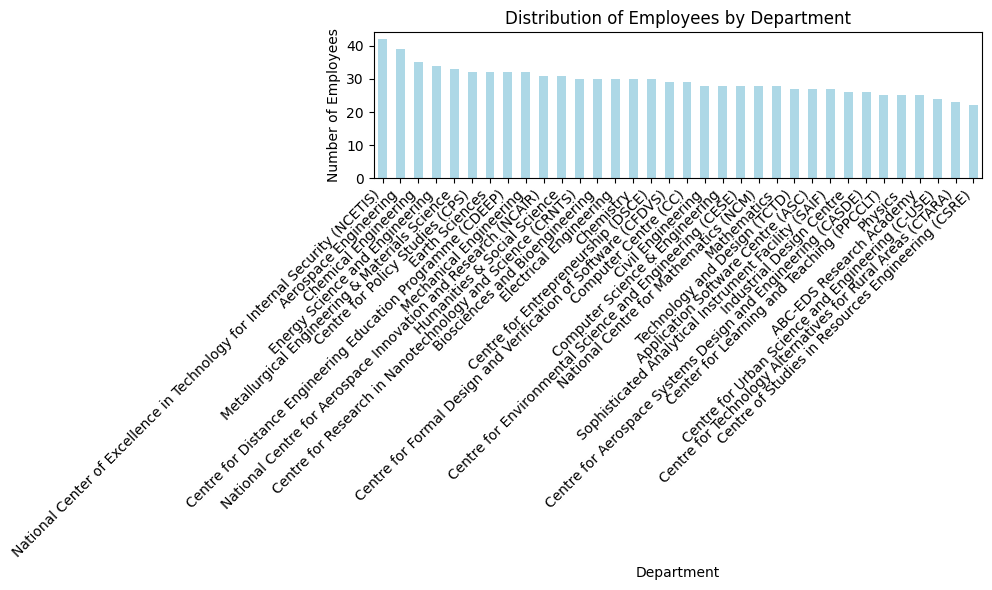

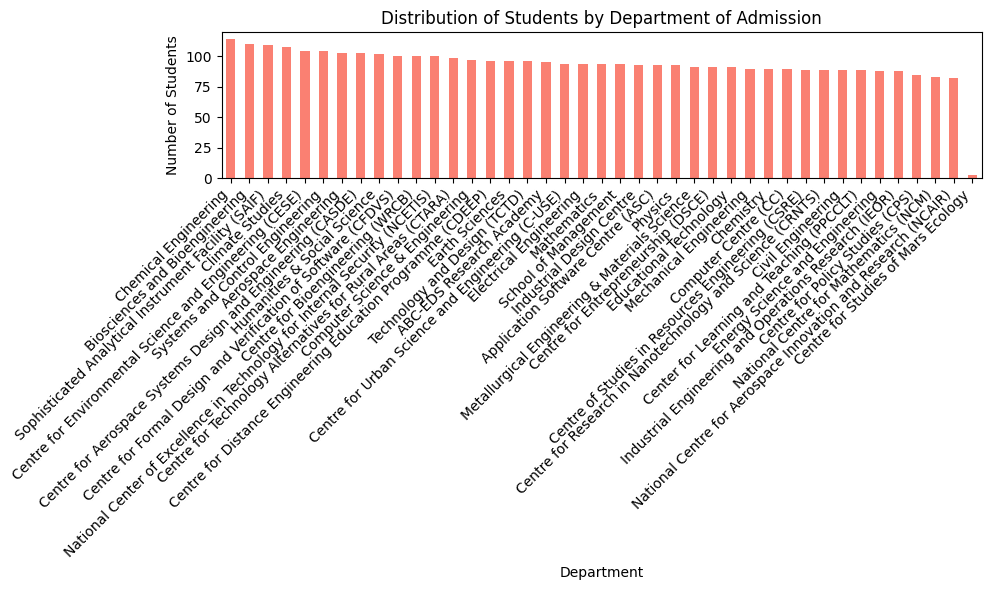

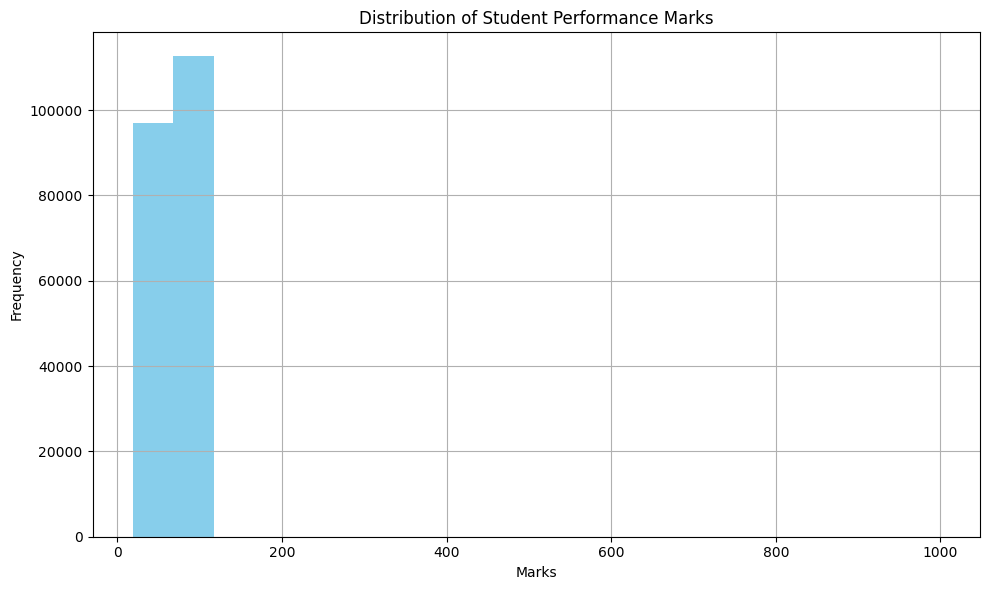

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge
employee_department_df = pd.merge(employee_df, department_df, on='Department_ID', how='left')
student_department_admission_df = pd.merge(counseling_df, department_df, left_on='Department_Admission', right_on='Department_ID', how='left')
student_performance_df = pd.merge(performance_df, counseling_df, on='Student_ID', how='left')


# Distribution of employees by department
plt.figure(figsize=(10, 6))
employee_department_df['Department_Name'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Distribution of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution of students by department of admission
plt.figure(figsize=(10, 6))
student_department_admission_df['Department_Name'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Students by Department of Admission')
plt.xlabel('Department')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution of student performance marks
plt.figure(figsize=(10, 6))
student_performance_df['Marks'].hist(bins=20, color='skyblue')
plt.title('Distribution of Student Performance Marks')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = student_performance_df[['Effort_Hours']]
y = student_performance_df['Marks']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


next_paper_effort = 20  # Example value, replace it with the actual effort
next_paper_grade = model.predict([[next_paper_effort]])
print("Predicted grade for the next paper (assuming an effort of", next_paper_effort, "hours):", next_paper_grade[0])


Mean Squared Error: 22.36644049309141
R-squared: 0.9317294469269375


/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted grade for the next paper (assuming an effort of 20 hours): 141.87942902738047
